# 一、Tensorflow与深度学习笔记 

- **Author:**currydai
- **Date:**4/3/2021 

## 目录

01. 人工智能简介
02. 回归问题
03. 分类问题
04. tensorflow基础
05. tensorflow进阶
06. 神经网络
07. 反向传播算法
08. Keras高级接口
09. 过拟合
10. 卷积神经网络
11. 循环神经网络
12. 自编码器
13. 生成对抗网络
14. 强化学习
15. 自定义数据集 

## 前述

深度学习相对与其他常规机器学习以及数值优化算法规模更大，主要体现在深层次的复杂网络导致前后向的计算复杂。不过不用过度担心或者惧怕，很多机构已经基于软硬件系统开发出最优的计算框架，例如Tensorflow or Pytorch，我们可以很方便的使用它们。


然而在使用的过程中，我发现，由于框架太过简单，造成知识的退化。很多底层的原理一知半解，导致在实现各种模型时理解不到位。因此本文基于这种考虑，从原理公式结合tensorflow实现原理出发，深入理解深度学习相关模型与实现方法。

$$公式+原理+代码$$  

## 1.人工智能绪论 

定义： 人工智能是让机器获得像人类一样具有思考和推理机制的智能技术

发展：人工智能的发展主要经历过三个阶段，每个阶段都代表了人们从不同的角度尝试实现人工智能的探索足迹

$$推理期->机器学习->神经网络$$

### 1.1 机器学习

**机器学习分类：**
- 有监督学习 Supervised Learning
- 无监督学习 Unsupervised Learning
- 强化学习 Reinforcrment Learning

- **有监督学习** 有监督学习的数据集包含了样本𝒙与样本的标签𝒚，算法模型需要学习到
映射关系𝑓𝜃: 𝒙 → 𝒚，其中𝑓𝜃代表模型函数，𝜃为模型的参数。在训练时，通过计算模型的预
测值𝑓𝜃(𝒙)与真实标签𝒚之间的误差来优化网络参数𝜃，使得网络下一次能够预测更精准。常
见的有监督学习有线性回归、逻辑回归、支持向量机、随机森林等。

- **无监督学习** 收集带标签的数据往往代价较为昂贵，对于只有样本𝒙的数据集，算法需
要自行发现数据的模态，这种方式叫作无监督学习。无监督学习中有一类算法将自身作为
监督信号，即模型需要学习的映射为𝑓𝜃: 𝒙 → 𝒙，称为自监督学习(Self-supervised 
Learning)。在训练时，通过计算模型的预测值𝑓𝜃(𝒙)与自身𝒙之间的误差来优化网络参数𝜃。
常见的无监督学习算法有自编码器、生成对抗网络等。

- **强化学习** 也称为增强学习，通过与环境进行交互来学习解决问题的策略的一类算法。
与有监督、无监督学习不同，强化学习问题并没有明确的“正确的”动作监督信号，算法
需要与环境进行交互，获取环境反馈的滞后的奖励信号，因此并不能通过计算动作与“正
确动作”之间的误差来优化网络。常见的强化学习算法有 DQN，PPO 等。

Tips：后续会有专门的课程区去介绍机器学习的理论、算法与应用，在这里就不展开扩展

### 1.2神经网络与深度学习发展

- 神经网络：一类基于神经网络从数据中学习的算法
- 深度学习：将利用深层神经网络实现的算法

2006 年以前，深度学习以神经网络和连接主义名义发展，历经了两次兴盛和两次
寒冬

2006 年，Geoffrey Hinton 首次将深层神经网络命名为深度学习，自此开启了深度学
习的第三次复兴之路。

**浅层神经网络伴随着机器学习的发展逐渐成熟** 

**1943-1969年为人工智能发展的第一次兴盛期**
- 1943 神经元模型
- 1950 图灵测试
- 1958 感知机模型 

**1982-1995年第二次人工智能复兴的大潮**
- 1969 XOR异或问题
- 1974 反向传播算法
- 1982 Hopfield网络
- 1985 Boltzmann机器
- 1986 受限Boltzmann MLP RNN
- 1990 LeNet 

**2006-至今第三次人工智能的复兴**
- 1997 LSTM
- 2006 DBN深度置信网络

深度学习逐渐取代浅层神经网络，成为第三次人工智能的热点，并且在2012开启了深度学习的新纪元

- 2009 ImageNet
- 2012 AlexNet
- 2014 GAN生成对抗网络
- 2014 VGG GoogLeNet
- 2015 ResNet
- 2015 DQN
- 2015 Batch Normalization
- 2015 TensorFlow发布
- 2016 AlphaGo
- 2017 AlphaGo Zero
- 2018 BERT机器翻译
- 2019 Pluribus德州扑克
- 2019 OpenAI Five
- 2019 TensorFlow2.0发布 

### 1.3 深度学习的特点

#### 数据量

- 1936 Iris:150样本
- 1998 MNIST：70000样本
- 2010 ImageNet:14197122 11400万样本
- 总之，数据量在逐渐增大

#### 计算力

x86 CPU 的曲线变化相对缓慢，而 NVIDIA GPU的浮点计算能力指数式增长，这主要是由日益增长的游戏计算量和深度学习计算量等业务驱动的。

#### 网络规模

- AlexNet：8层
- VCG16：16层
- GoogLeNet:22层
- ResNet50：50层
- DenseNet121：121层

网络的总参数量可达到千万级别

Tips:成年人大脑中包含了约 1000 亿个神经元，每个神经元通过树突获取输入信号，通过轴
突传递输出信号，神经元之间相互连接构成了巨大的神经网络，从而形成了人脑的感知和
意识基础

#### 通用智能

- 依靠人工设计的特征和先验设定无法自适应新场景，模型通用性不强。
- 深度学习端对端进行训练，适应性强

Ex.DeepMind设计的DNQ算法可以在相同的算法、模型结构和参数情况下，在49个游戏获得人类相当的游戏水平，通用性很强

### 1.4深度学习应用场景

#### 计算机视觉

- 图片识别
- 目标检测
- 语义分割
- 视频理解
- 图片生成

- 艺术风格迁移
- 超分辨率
- 图片去噪/去雾
- 灰度图片着色

图片识别(Image Classification) 是常见的分类问题。神经网络的输入为图片数据，输出
值为当前样本属于每个类别的概率分布。通常选取概率值最大的类别作为样本的预测类
别。图片识别是最早成功应用深度学习的任务之一，经典的网络模型有 VGG 系列、
Inception 系列、ResNet 系列等。

目标检测(Object Detection) 是指通过算法自动检测出图片中常见物体的大致位置，通
常用边界框(Bounding box)表示，并分类出边界框中物体的类别信息。常
见的目标检测算法有 RCNN、Fast RCNN、Faster RCNN、Mask RCNN、SSD、YOLO 系列
等。

语义分割(Semantic Segmentation) 是通过算法自动分割并识别出图片中的内容，可以
将语义分割理解为每个像素点的分类问题，分析每个像素点的物体的类别信息，如图 1.16
所示。常见的语义分割模型有 FCN、U-net、SegNet、DeepLab 系列等。

视频理解(Video Understanding) 随着深度学习在 2D 图片的相关任务上取得较好的效
果，具有时间维度信息的 3D 视频理解任务受到越来越多的关注。常见的视频理解任务有
视频分类、行为检测、视频主体抽取等。常用的模型有 C3D、TSN、DOVF、TS_LSTM
等。


图片生成(Image Generation) 通过学习真实图片的分布，并从学习到的分布中采样而获
得逼真度较高的生成图片。目前常见的生成模型有 VAE 系列、GAN 系列等。其中 GAN 系
列算法近年来取得了巨大的进展，最新 GAN 模型产生的图片效果达到了肉眼难辨真伪的
程度

#### 自然语言处理 

机器翻译(Machine Translation) 过去的机器翻译算法通常是基于统计机器翻译模型，这
也是 2016 年前 Google 翻译系统采用的技术。2016 年 11 月，Google 基于 Seq2Seq 模型上
线了 Google 神经机器翻译系统(GNMT)，首次实现了源语言到目标语言的直译技术，在多
项任务上获得了 50~90%的效果提升。常用的机器翻译模型有 Seq2Seq、BERT、GPT、
GPT-2 等，其中 OpenAI 提出的 GPT-2 模型参数量高达 15 亿个，甚至发布之初以技术安全
考虑为由拒绝开源 GPT-2 模型。


聊天机器人(Chatbot) 聊天机器人也是自然语言处理的一项主流任务，机器自动学习与
人类对话，对于人类的简单诉求提供满意的自动回复，提高客户的服务效率和服务质量
等。常用在咨询服务、娱乐系统、智能家居

#### 强化学习

虚拟游戏 相对于真实环境，虚拟游戏平台既可以训练、测试强化学习算法，又可以避
免无关因素干扰，同时也能将实验代价降到最低。目前常用的虚拟游戏平台有 OpenAI 
Gym、OpenAI Universe、OpenAI Roboschool、DeepMind OpenSpiel、MuJoCo 等，常用的
强化学习算法有 DQN、A3C、A2C、PPO 等。在围棋领域，DeepMind AlaphGo 程序已经
超越人类围棋专家；在 Dota2 和星际争霸游戏上，OpenAI 和 DeepMind 开发的智能程序也
在限制规则下战胜了职业队伍。


机器人(Robotics) 在真实环境中，机器人的控制也取得了一定的进展。如 UC Berkeley
实验室在机器人领域的 Imitation Learning、Meta Learning、Few-shot Learning 等方向上取得
了不少进展。美国波士顿动力公司在机器人应用中取得喜人的成就，其制造的机器人在复
杂地形行走、多智能体协作等任务上表现良好。 


自动驾驶(Autonomous Driving) 被认为是强化学习短期内能技术落地的一个应用方
向，很多公司投入大量资源在自动驾驶上，如百度、Uber、Google 无人车等，其中百度的
无人巴士“阿波龙”已经在北京、雄安、武汉等地展开试运营。

#### 商业智能(BI)

为提高企业经营绩效而采用的一系列方法、技术和软件的总和。通常被理解为将企业中的现有数据转换为知识并帮助企业做出明智的业务决策的工具。

## 2.回归问题 

- 回归问题：对样本集合$D=(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),……,(x^{(n)},y^{(n)})$ ，寻找一条最好的曲线，使它尽可能让所有采样点到该曲线的误差最小。
- 优化方法：$$w^*,b^*=argmin_{w,b}{\frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}$$

梯度下降算法(Gradient Descent)是神经网络训练中最常用的优化算法，配合
强大的图形处理芯片 GPU(Graphics Processing Unit)的并行加速能力，非常适合优化海量数
据的神经网络模型，自然也适合优化我们这里的神经元线性模型。这里先简单地应用梯度
下降算法，用于解决神经元模型预测的问题。由于梯度下降算法是深度学习的核心算法，
我们将在第 7 章非常详尽地推导梯度下降算法在神经网络中的应用，这里先给读者第一印
象。

**Question 2.1:在机器学习算法中为什么经常求导数？**

Ans:

$$f(x)=x^2*sin(x)$$

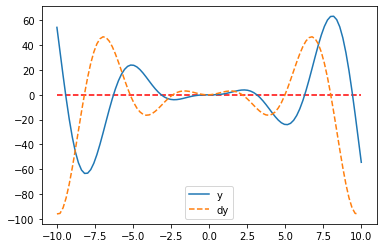

In [27]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-10,10,100)
y=x**2*np.sin(x) 

dy=np.diff(y)/np.diff(x)

plt.figure()
plt.plot(x,y) 
plt.plot(x[0:len(x)-1],dy,'--') 
plt.hlines(0,-10,10,linestyles='--',colors='r')
plt.legend(['y','dy'])
plt.show() 

从上图可以看到，蓝色是$f(x)$波形，橙色是其导数$dy$的波形，红色是零刻度线。原始波形的极值点都是其导数的零点，因此在我们求解极值点可以通过求解导数的零点

因此在对损失函数求解最小值的过程中，我们就可以不断进行更新参数，每次确保都达到极值。

$$f(x,y)=-(cos^2(x)+cos^2(y))^2$$

$$df(x,y)/dx=-2*(cos^2(x)+cos^2(y))*(-2*cos(x)*sin(x))$$ 
$$df(x,y)/dy=-2*(cos^2(x)+cos^2(y))*(-2*cos(y)*sin(y))$$ 

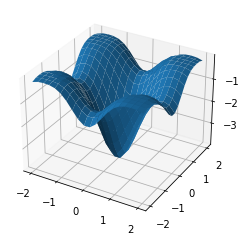

In [102]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
from sympy import *

x=np.linspace(-2,2,20)
y=np.linspace(-2,2,20) 
z=-(np.cos(x)**2+np.cos(y)**2)**2

#x_s, y_s = symbols('x, y')
#dx = diff(z, x_s) 
#dy = diff(z, y_s)

X,Y=np.meshgrid(x,y)  
Z=-(np.cos(X)**2+np.cos(Y)**2)**2  

fig = plt.figure() 
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z)   
plt.show()  

### 基于梯度下降 线性模型实战

在介绍了用于优化𝑤和𝑏的梯度下降算法后，我们来实战训练单输入神经元线性模型。
首先我们需要采样自真实模型的多组数据，对于已知真实模型的玩具样例(Toy Example)，
我们直接从指定的𝑤 = 1. , 𝑏 = . 的真实模型中直接采样：

$$y=1.477x+0.089$$ 

- 采样数据

为了能够很好地模拟真实样本的观测误差，我们给模型添加误差自变量𝜖，它采样自均
值为 0，标准差为 0.01 的高斯分布：

In [200]:
data=[]
for i in range(100):
    x=np.random.uniform(-10,10)
    eps=np.random.normal(0,0.01)
    
    y=1.477*x+0.089+eps
    
    data.append([x,y])
    
data=np.array(data) 

**计算误差**

总体误差是每个样本点的误差累计，我们误差用均方根误差：
$$L={\frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}$$

In [201]:
def mse(w,b,points):
    totalError=0
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1] 
        totalError=totalError+(y-w*x-b)**2
    return totalError/float(len(points))

**计算梯度**

梯度指示我们如何快速准确进行参数更新，向损失函数最小的方向前进。

梯度下降需要我们在一组$(w,b)$下，计算出函数在每一个点$(x_i,y_i)$上的梯度信息从而求解出整体的平均梯度信息：$(\frac {\partial L}{\partial w},\frac {\partial L}{\partial b})$ 

$$\frac {\partial L}{\partial w}=\frac {{\partial \frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}}{\partial w}={\frac {2}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})\cdot x^{(i)}}}}$$

$$\frac {\partial L}{\partial b}=\frac {{\partial \frac {1}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})^2}}}}{\partial b}={\frac {2}{n}{\sum _{i=1}^{n}{(wx^{(i)}+b-y^{(i)})}}}$$

$$w_{new}=w_{current}-Ir*\frac {\partial L}{\partial w}$$

$$b_{new}=b_{current}-Ir*\frac {\partial L}{\partial b}$$ 


因此我们只需要计算在每一个点上面的(𝑤𝑥
(𝑖) + 𝑏 − 𝑦
(𝑖)
) ∙
𝑥
(𝑖)和(𝑤𝑥
(𝑖) + 𝑏 − 𝑦
(𝑖)
)值，平均后即可得到偏导数 

In [202]:
def step_gradient(w,b,points,lr):
    
    w_gradient=0
    b_gradient=0
    M=float(len(points))
    
    for i in range(len(points)):
        x=points[i,0]
        y=points[i,1] 
                
        w_gradient=w_gradient+(2/M)*x*(w*x+b-y)
        b_gradient=b_gradient+(2/M)*(w*x+b-y)
        
    new_w=w-(Ir*w_gradient)
    new_b=b-(Ir*b_gradient)
    
    return [new_w,new_b] 

**梯度更新** 

在计算出误差函数在w和b的梯度后，结合学习速度更新w和b的值。我们把对数据集的所有样本训练一次成为一个Epoch，共循环迭代num_iterations个Epoch。

In [217]:
def gradient_descent(points,starting_w,starting_b,Ir,num_iterations):
    
    w=starting_w
    b=starting_b
    
    LOSS=[]
    for step in range(num_iterations):
        
        w,b=step_gradient(w,b,points,Ir)
        loss=mse(w,b,points)
        LOSS.append(loss)
        if(step%50==0):
            print("iteration:%s,loss:%s,w:%s,b:%s"%(step,loss,w,b)) 
            
    ax=plt.subplot(1,1,1)
    ax.plot(LOSS)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('LOSS')
    plt.show() 
    return [w,b] 

**主函数**

iteration:0,loss:4.574514477638161,w:1.1311713319357741,b:-0.005810987512666079
iteration:50,loss:0.001327531727641994,w:1.4767887525613463,b:0.05280077934967765
iteration:100,loss:0.0002658164827281588,w:1.4769415108330748,b:0.07504846551846345
iteration:150,loss:0.0001245059340448667,w:1.4769972406993421,b:0.08316495283474867
iteration:200,loss:0.00010569799918207294,w:1.477017572285704,b:0.08612604127584005
iteration:250,loss:0.00010319472948919502,w:1.4770249897340435,b:0.08720631706686756
iteration:300,loss:0.0001028615531356494,w:1.4770276957963686,b:0.08760042747859505
iteration:350,loss:0.00010281720853990883,w:1.4770286830325412,b:0.08774420837040259
iteration:400,loss:0.0001028113064308593,w:1.4770290431998778,b:0.08779666307404348
iteration:450,loss:0.00010281052088099372,w:1.477029174597525,b:0.08781579980284986
iteration:500,loss:0.0001028104163270803,w:1.4770292225345252,b:0.08782278133861285
iteration:550,loss:0.0001028104024113252,w:1.477029240023088,b:0.087825328369618

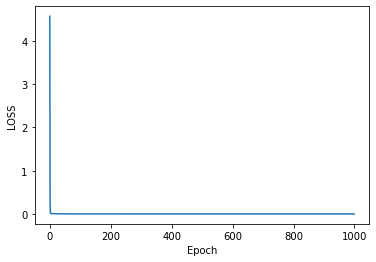

Final loss:76.84746471578383, w:0.0878267911280228, b:1.4770292500667592


In [218]:
Ir=0.01
initial_b=0
initial_w=0
num_iterations=1000
[b,w]=gradient_descent(data,initial_w,initial_b,Ir,num_iterations) 
loss = mse(w, b, data)
print(f'Final loss:{loss}, w:{w}, b:{b}')

简单回顾一下我们的探索之路：首先假设𝑛个输入的生物神经元的数学模型为线性模
型之后，只采样𝑛 + 1个数据点就可以估计线性模型的参数𝒘和𝑏。引入观测误差后，通过
梯度下降算法，我们可以采样多组数据点循环优化得到𝒘和𝑏的数值解。

对于预测值是连续的实数范围，或
者属于某一段连续的实数区间，我们把这种问题称为回归(Regression)问题。特别地，如果
使用线性模型去逼近真实模型，那么我们把这一类方法叫做线性回归(Linear Regression，
简称 LR)，线性回归是回归问题中的一种具体的实现。

## 3.分类问题

我们将以数字图片识别为例，探索如何用机器学习的方法去解决这个问题。

MNIST:60000+10000，28*28，灰度值

In [223]:
import os
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers,optimizers,datasets

In [291]:
(x,y),(x_val,y_val)=datasets.mnist.load_data()  
x_input=2*tf.convert_to_tensor(x,dtype=tf.float32)/255-1
y_output=tf.one_hot(y,depth=10)
print(x_input.shape)
print(y_output.shape) 

(60000, 28, 28)
(60000, 10)


In [293]:
train_dataset=tf.data.Dataset.from_tensor_slices((x_input,y_output))
train_dataset=train_dataset.batch(512)

每一张图片的计算流程是通用的，我们在计算的过程中可以一次进行多张图片的计算，充分利用 CPU 或 GPU 的并行计算能力。我们用形状为[ℎ, 𝑤]的矩阵来表示一张图片，对于多张图片来说，我们在前面添加一个**数量维度(Dimension)**，使用形状为[𝑏, ℎ, 𝑤]的张量来表示，其中𝑏代表了批量(Batch Size)；多张彩色图片可以使用形状为[𝑏, ℎ, 𝑤, 𝑐]的张量来表示，其中**𝑐表示通道数量**(Channel)，彩色图片𝑐 = 3。**通过 TensorFlow 的 Dataset 对象可以方便完成模型的批量训练，只需要调用 batch()函数即可构建带 batch 功能的数据集对象**  

### 3.1 基础知识

在真正介绍应用之前，首先介绍一些神经网络的基础知识

**非线性模型：激活函数**


- Sigmoid函数

$$f(x)=\frac {1}{1+e^{-z}}$$

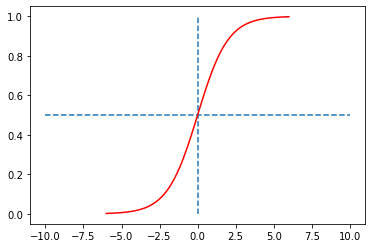

In [294]:
z=np.linspace(-6,6,100)
y=1/(1+np.exp(-(z)))
ax=plt.subplot(111)
ax.plot(z,y,'r')
plt.vlines(0,0,1,linestyles='--')
plt.hlines(0.5,-10,10,linestyles='--')
plt.show() 

- Rule函数

$$f(x)=\begin{cases}
0& \text{x<0}\\
x& \text{x>0}
\end{cases}$$ 

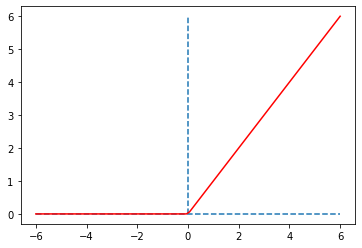

In [295]:
z=np.linspace(-6,6,100)
y=[]
for i in z:
    if(i<0):
        y.append(0)
    else:
        y.append(i)
y=np.array(y)
ax=plt.subplot(111)
ax.plot(z,y,'r')
plt.vlines(0,0,6,linestyles='--')
plt.hlines(0,-6,6,linestyles='--')
plt.show()  

ReLU 函数非常简单，在𝑦 = 𝑥的基础上面截去了𝑥 < 0的部分，可以直观地理解为
ReLU 函数仅保留正的输入部份，清零负的输入，具有单边抑制特性。虽然简单，ReLU 函
数却有优良的非线性特性，而且梯度计算简单，训练稳定，是深度学习模型使用最广泛的
激活函数之一。

**表达能力**

针对于模型的表达能力偏弱的问题，可以通过重复堆叠多次变换来增加其表达能力

**优化方法**

对于仅一层的网络模型，如线性回归的模型，我们可以直接推导出𝜕ℒ𝜕𝑤和𝜕ℒ𝜕𝑏的偏导数表
达式，然后直接计算每一步的梯度，根据梯度更新法则循环更新𝑤和𝑏参数即可。但是，当
网络层数增加、数据特征长度增大以及添加复杂的非线性函数之后，模型的表达式将变得
非常复杂，很难手动推导出模型和梯度的计算公式。而且一旦网络结构发生变动，网络的
模型函数也随之发生改变，依赖手动计算梯度的方式显然不可行。

这个时候就是深度学习框架发明的意义所在，借助于自动求导(Autograd)技术，深度学习框架在计算神经网络每层的输出以及损失函数的过程中，会构建神经网络的计算图模型，并自动完成任意参数𝜃的偏导数𝜕ℒ𝜕𝜃的计算，用户只需要搭建出网络结构，梯度将自动完成计算和更新，使用起来非常便捷高效。

### 3.2手写数字初体验

对于第一层模型来说，它接受的输入$𝒙 ∈ 𝑅^{784}$，输出$𝒉1 ∈ 𝑅^{256}$设计为长度为 256 的向量，我们不需要显式地编写$𝒉1 = ReLU(𝑾_1𝒙 + 𝒃_1)$的计算逻辑，在 TensorFlow 中通过一行代码即可实现：

    layers.Dense(256,activation='relu')

使用 TensorFlow 的 Sequential 容器可以非常方便地搭建多层的网络。对于 3 层网络，我们
可以通过快速完成 3 层网络的搭建。


In [296]:
model=keras.Sequential()
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='linear'))

In [307]:
with tf.GradientTape() as tape:
    
    #拉平操作：[batch,28,28]->[batch,784]
    x=tf.reshape(x_input,(-1,28*28))
    
    #得到模型输出output: [batch,784]->[batch,10]
    out=model(x)
    
    #计算差的平方 [b,10]
    loss = tf.square(out-y_output)
    
    #计算每个样本的平均误差
    loss = tf.reduce_sum(loss) / x.shape[0] 

In [308]:
grads = tape.gradient(loss, model.trainable_variables) 

In [314]:
tf.keras.optimizers.apply_gradients(zip(grads, model.trainable_variables))

AttributeError: module 'tensorflow.keras.optimizers' has no attribute 'apply_gradients'